In [2]:
from idaes.surrogate.pysmo import radial_basis_function
from scipy.interpolate import griddata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

# Data

## Loading

In [3]:
df = pd.read_excel("data/example_new_data.xlsx")
df.head()

,x1,x2,x3,y
0,6,12,6.2,3.92
1,6,18,3.8,4.13
2,6,24,1.4,3.56
3,9,12,3.2,8.60
4,9,24,0.0,8.10


In [4]:
data = df.to_numpy()
data

array([[ 6.  , 12.  ,  6.2 ,  3.92],
       [ 6.  , 18.  ,  3.8 ,  4.13],
       [ 6.  , 24.  ,  1.4 ,  3.56],
       [ 9.  , 12.  ,  3.2 ,  8.6 ],
       [ 9.  , 24.  ,  0.  ,  8.1 ],
       [12.  , 12.  ,  0.  ,  7.87],
       [12.  , 18.  ,  0.  , 14.49],
       [12.  , 24.  ,  0.  , 10.48],
       [ 9.  ,  9.  ,  5.6 ,  9.77],
       [12.  ,  9.  ,  3.8 ,  8.24],
       [15.  ,  9.  ,  2.  ,  8.63],
       [ 9.  , 12.  ,  2.6 , 13.72],
       [12.  , 12.  ,  0.8 , 12.28],
       [15.  , 12.  ,  0.  , 12.42],
       [12.  , 15.  ,  0.  , 11.3 ],
       [15.  , 15.  ,  0.  ,  8.53],
       [ 5.  , 12.  ,  5.6 , 14.03],
       [ 5.  , 15.  ,  3.8 , 13.33],
       [ 5.  , 18.  ,  2.  , 10.93],
       [ 7.  , 12.  ,  2.6 , 18.76],
       [ 7.  , 15.  ,  0.8 , 17.67],
       [ 7.  , 18.  ,  0.  , 16.95],
       [ 9.  , 12.  ,  0.  , 27.83],
       [ 9.  , 15.  ,  0.  , 19.85],
       [ 9.  , 18.  ,  0.  , 17.73],
       [ 7.  , 12.  ,  0.  , 11.71]])

## Convert to weight ratio (optional)

This section is a data preprocessing step. You need to preprocess your data appropriately to align with the characteristics of your new dataset.

In [5]:
data.transpose()[0][:] = data.transpose()[0][:]/20
data.transpose()[1][:] = data.transpose()[1][:]/20
data.transpose()[2][:] = data.transpose()[2][:]/20

# Radial Basis Function (RBF)

## Model definition and training

In [6]:
rbf_model = radial_basis_function.RadialBasisFunctions(XY_data=data, basis_function='gaussian', regularization=False)
rbf_model.training()


Default parameter estimation method is used.

Parameter estimation method:  algebraic
Basis function:  gaussian
Regularization done:  False
0.001    |     0    |     5369.651990198227    |     3.462539446915354e+18    |     768.8382035276562    |     3.462539446915354e+18    |     768.8382035276562
0.002    |     0    |     187554.9880500134    |     6.721962209603487e+18    |     1492.5754431523967    |     6.721962209603487e+18    |     1492.5754431523967
0.005    |     0    |     25596250.99401337    |     2.1250303445594327e+18    |     471.8515233114024    |     2.1250303445594327e+18    |     471.8515233114024
0.0075    |     0    |     14896130.967030691    |     2.361373673603541e+18    |     524.3302844356681    |     2.361373673603541e+18    |     524.3302844356681
0.01    |     0    |     25978.59583686589    |     2.1882274832348431e+18    |     485.8841070009763    |     2.1882274832348431e+18    |     485.8841070009763
0.02    |     0    |     4388.5393972628035    |    


Results of radial basis function run:

Basis function type               : gaussian
Shape parameter                    : 5.0
Regularization parameter           : 0.0
Number of terms in RBF model       : 27

RBF Expression:
--------------------------

3.56 + 24.27*(-0.40327832260566415*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.31 - 1.0)**2)**0.5)**2) - 0.11139862878846808*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.6)**2 + (IndexedParam[2]/0.31 - 0.6129032258064516)**2)**0.5)**2) - 0.008866291264113644*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 1.0)**2 + (IndexedParam[2]/0.31 - 0.2258064516129032)**2)**0.5)**2) - 0.30950732435132955*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.

## Mathematical expressions of the model

In [7]:
vars = rbf_model.get_feature_vector()

list_vars = []
for i in vars.keys():
    list_vars.append(vars[i])

print(rbf_model.generate_expression(list_vars))

3.56 + 24.27*(-0.40327832260566415*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.31 - 1.0)**2)**0.5)**2) - 0.11139862878846808*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.6)**2 + (IndexedParam[2]/0.31 - 0.6129032258064516)**2)**0.5)**2) - 0.008866291264113644*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 1.0)**2 + (IndexedParam[2]/0.31 - 0.2258064516129032)**2)**0.5)**2) - 0.30950732435132955*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.31 - 0.5161290322580645)**2)**0.5)**2) + 0.15029069937909328*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.75 - 1.0)**2 + (IndexedParam[2]/0.31)**2)**0.5)**2) - 0.29061786405807843*exp(- (5.0*(((IndexedParam[0] - 0.2

## Single-point prediction

In [8]:
single_point = [[0.45, 0.6, 0]]
unsampled_points = np.array(single_point)
ys = rbf_model.predict_output(unsampled_points)
print(ys)

[[27.83]]


## Visualization

In [9]:
x1 = np.linspace(data.transpose()[0].min(), data.transpose()[0].max(), 100)
x2 = np.linspace(data.transpose()[1].min(), data.transpose()[1].max(), 100)
x3 = np.linspace(data.transpose()[2].min(), data.transpose()[2].max(), 100)

x1, x2, x3 = np.meshgrid(x1, x2, x3)

x1_list = []
x2_list = []
x3_list = []

for i in range(x1.shape[0]):
    for j in range(x1.shape[0]):
        for k in range(x1.shape[0]):
#             print(x1[i][j][k], x2[i][j][k], x3[i][j][k])
            x1_list.append(x1[i][j][k])
            x2_list.append(x2[i][j][k])
            x3_list.append(x3[i][j][k])

x_123 = np.array(list(zip(x1_list, x2_list, x3_list)))
y = rbf_model.predict_output(x_123)
xy = np.concatenate([x_123, y], 1) 

df_xy = pd.DataFrame(xy, columns = ['x1','x2','x3', 'y'])
df_xy = df_xy.loc[df_xy.x3==0.0].copy() # Applying the condition where x3 is zero

x1 = df_xy['x1']
x2 = df_xy['x2']
x3 = df_xy['x3']
y = df_xy['y']

grid_x1, grid_x2 = np.mgrid[x1.min():x1.max():1000j, x2.min():x2.max():1000j]

points = np.column_stack((x1,x2))
values = df_xy['y']

zi = griddata(points, values, (grid_x1, grid_x2), method='cubic') #cubic, linear

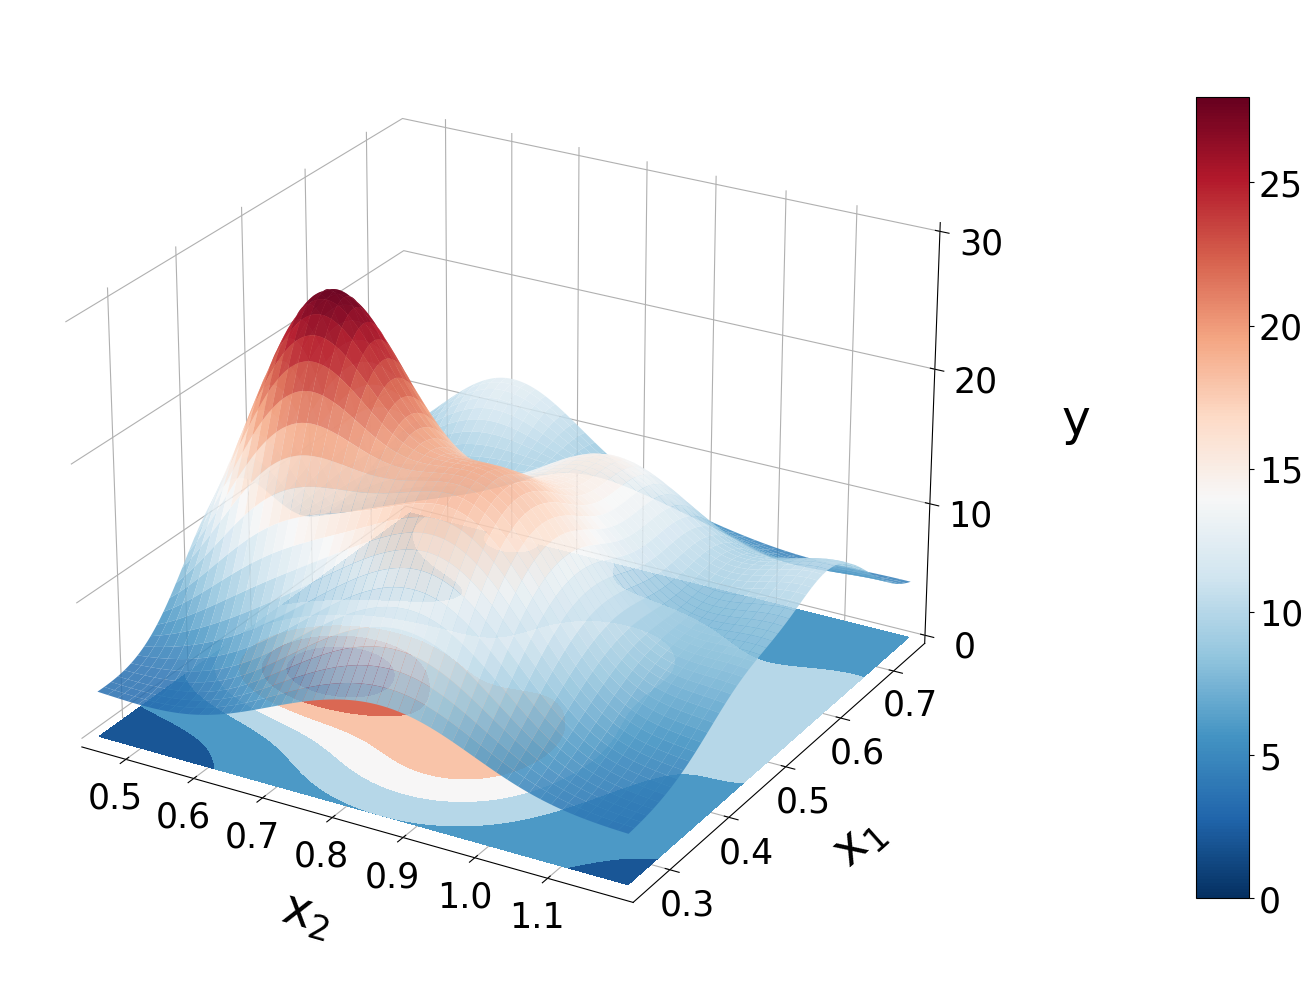

In [11]:
# Figure
fig = plt.figure(figsize=(18,13))
ax = plt.axes(projection='3d', computed_zorder=False)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

vmin = 0
vmax = zi.max()
cmap = "RdBu_r"

# color bar
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.8, aspect=15, pad = 0.15)

#plot
ax.plot_surface(grid_x2, grid_x1, zi, cmap=cmap, vmin=vmin, vmax=vmax, linewidth=0, alpha=.85, zorder=-1)
ax.contourf(grid_x2, grid_x1, zi, zdir='z', offset=0, cmap=cmap, vmin=vmin, vmax=vmax, zorder=-3)

plt.xlim([0.45, 1.2])
plt.xticks(np.arange(0.5, 1.2, 0.1))
plt.ylim([0.25, 0.75])
plt.yticks(np.arange(0.3, 0.75, 0.1))
ax.set_zlim(0,zi.max())
ax.set_zticks(np.arange(0, 31, 10))
ax.tick_params(axis='z', which='major', pad=10)

plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

ax.set_xlabel("x$_2$", fontsize=35, labelpad=27)
ax.set_ylabel("x$_1$", fontsize=35, labelpad=27)

ax.zaxis.set_rotate_label(False) 
ax.set_zlabel("y", fontsize=35, rotation = 0, labelpad=43)

ax.view_init(25,-60)

fig.savefig("figure",bbox_inches='tight', dpi= 300)

plt.show()

# Model evaluation

## Parity plot

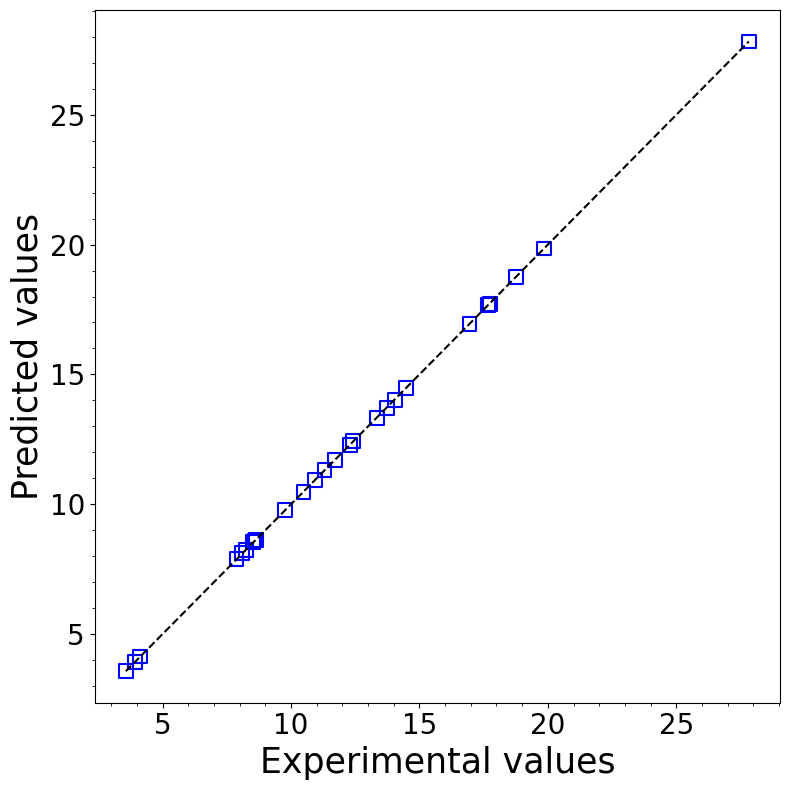

R2:  1.0 
RMSE:  8.11370363604921e-17


In [12]:
fig1 = plt.figure(figsize=(8, 8), tight_layout=True)

ax = fig1.add_subplot()
ax.plot([rbf_model.y_data_unscaled.min(),rbf_model.y_data_unscaled.max()], [rbf_model.y_data_unscaled.min(),rbf_model.y_data_unscaled.max()], '--', color='k') 
ax.scatter(rbf_model.y_data_unscaled, rbf_model.output_predictions, marker='s', s=100, facecolors='none', edgecolors='b',linewidths=1.5)

mybox={'facecolor':'w','edgecolor':'gray','boxstyle':'round','alpha':0.9}

ax.set_xlabel('Experimental values', fontsize=25)
ax.set_ylabel('Predicted values', fontsize=25)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)
plt.minorticks_on()

plt.savefig("parity plot",bbox_inches='tight', dpi= 300)

plt.show()

print('R2: ', rbf_model.R2, '\nRMSE: ', rbf_model.rmse)

## Model report

In [13]:
rbf_model.print_report()


Results of radial basis function run:

Basis function type               : gaussian
Shape parameter                    : 5.0
Regularization parameter           : 0.0
Number of terms in RBF model       : 27

RBF Expression:
--------------------------

3.56 + 24.27*(-0.40327832260566415*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.31 - 1.0)**2)**0.5)**2) - 0.11139862878846808*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.6)**2 + (IndexedParam[2]/0.31 - 0.6129032258064516)**2)**0.5)**2) - 0.008866291264113644*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.09999999999999998)**2 + ((IndexedParam[1] - 0.45)/0.75 - 1.0)**2 + (IndexedParam[2]/0.31 - 0.2258064516129032)**2)**0.5)**2) - 0.30950732435132955*exp(- (5.0*(((IndexedParam[0] - 0.25)/0.5 - 0.4)**2 + ((IndexedParam[1] - 0.45)/0.75 - 0.19999999999999996)**2 + (IndexedParam[2]/0.

In [14]:
rbf_model.leave_one_out_crossvalidation()

0.001    |     0    |     5369.651990198227    |     3.462539446915354e+18    |     768.8382035276562    |     3.462539446915354e+18    |     768.8382035276562
0.002    |     0    |     187554.9880500134    |     6.721962209603487e+18    |     1492.5754431523967    |     6.721962209603487e+18    |     1492.5754431523967
0.005    |     0    |     25596250.99401337    |     2.1250303445594327e+18    |     471.8515233114024    |     2.1250303445594327e+18    |     471.8515233114024
0.0075    |     0    |     14896130.967030691    |     2.361373673603541e+18    |     524.3302844356681    |     2.361373673603541e+18    |     524.3302844356681
0.01    |     0    |     25978.59583686589    |     2.1882274832348431e+18    |     485.8841070009763    |     2.1882274832348431e+18    |     485.8841070009763
0.02    |     0    |     4388.5393972628035    |     8.311273475904038e+17    |     184.5473435381004    |     8.311273475904038e+17    |     184.5473435381004
0.05    |     0    |     1061.452

(5.0, 0.0, 1.3809929885596939)

In [15]:
# model.pickle_load('solution_v_06-30-22_184050.pickle')